In [80]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
%matplotlib inline

Dans cette étape, nous allons examiner les données de différentes manières :
Dimensions du jeu de données. Regardez les données elles-mêmes. Résumé statistique de tous les attributs. 


# Exploratory Data Analysis

In [81]:
df = pd.read_csv('dataset.csv')

In [82]:
df.head()

,surface,nb_Pieces,nb_chambre,nb_Salles_de_bains,etage,prix,ville
0,89,3,2,NaN,NaN,"2,453,000",casablanca
1,82,3,2,NaN,NaN,"1,956,000",casablanca
2,99,3,2,NaN,NaN,"2,068,000",casablanca
3,94,3,2,NaN,NaN,"1,804,000",casablanca
4,94,3,2,NaN,NaN,"1,804,000",casablanca


In [83]:
df.shape

(2707, 7)

In [84]:
df.columns

Index(['surface', 'nb_Pieces', 'nb_chambre', 'nb_Salles_de_bains', 'etage',
       'prix', 'ville'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   surface             2707 non-null   int64 
 1   nb_Pieces           2707 non-null   int64 
 2   nb_chambre          2706 non-null   object
 3   nb_Salles_de_bains  2597 non-null   object
 4   etage               1385 non-null   object
 5   prix                2707 non-null   object
 6   ville               2707 non-null   object
dtypes: int64(2), object(5)
memory usage: 148.2+ KB


In [86]:
display(df)

,surface,nb_Pieces,nb_chambre,nb_Salles_de_bains,etage,prix,ville
0,89,3,2,NaN,NaN,"2,453,000",casablanca
1,82,3,2,NaN,NaN,"1,956,000",casablanca
2,99,3,2,NaN,NaN,"2,068,000",casablanca
3,94,3,2,NaN,NaN,"1,804,000",casablanca
4,94,3,2,NaN,NaN,"1,804,000",casablanca
...,...,...,...,...,...,...,...
2702,67,3,1,1,NaN,"560,000",mohammédia
2703,73,3,2,1,NaN,"660,000",mohammédia
2704,110,3,2,1,4th,"2,000,000",mohammédia
2705,118,5,3,2,1st,"1,400,000",mohammédia


In [87]:
#display the datatype of all columns 
col_types=df.dtypes
print(col_types) 

surface                int64
nb_Pieces              int64
nb_chambre            object
nb_Salles_de_bains    object
etage                 object
prix                  object
ville                 object
dtype: object


>>Handeing Inconsistent Entries and Datatye Casting

>>the 'nb_chambre' column

In [88]:
#unique values of column 'nb_chambre'
df['nb_chambre'].unique()

array(['2', '3', '4', '1', '5', '7', '3rd', '10', '6', nan, '22'],
      dtype=object)

>>As we can see here the column is supposed to contain oly digits ,but '3rd' is not a digit

The same thing holds for 'nan' which is not a digit

>>>Handle the inconsistent entry : '3rd'¶

In [89]:
#locate the rows that contain the '3rd' values for 'nb_chambre' column
df.loc[(df['nb_chambre']=='3rd')]

,surface,nb_Pieces,nb_chambre,nb_Salles_de_bains,etage,prix,ville
951,138,3,3rd,NaN,NaN,"2,700,000",rabat


In [90]:
#drop this row that contain this inconsistent entry
df.drop(951, axis=0, inplace=True)

In [91]:
# Now well check the unique values of column 'nb_chambre'
df['nb_chambre'].unique()

array(['2', '3', '4', '1', '5', '7', '10', '6', nan, '22'], dtype=object)

 >>>the 'nb_Salles_de_bains' column

In [92]:
#unique values of column 'nb_Salles_de_bains'
df['nb_Salles_de_bains'].unique()

array([nan, '2', '3', '5', '1', 'New', '6th', '4', '7', '8th', '5th',
       'Good'], dtype=object)

>>As we can see ,there are some non numerical values like : New,6th,7th,8th,Good

>>To handle this problem we will replace them with nan

In [93]:
#replacing inconsistent entries with nan
na_values = ['New','6th','8th','5th','Good']
df['nb_Salles_de_bains'].replace(na_values,None,inplace=True)


In [94]:
#Now well check the unique values of column 'nb_Salles_de_bains'
df['nb_Salles_de_bains'].unique()

array([nan, '2', '3', '5', '1', None, '4', '7'], dtype=object)

In [95]:
#columns type conversion to the suitable datatype 
df['surface']            = df['surface'].astype('float')
df['nb_Pieces']          = df['nb_Pieces'].astype('Int32')
df['nb_chambre']         = df['nb_chambre'].astype(float).astype("Int32")
df['nb_Salles_de_bains'] = df['nb_Salles_de_bains'].astype(float).astype("Int32")

In [96]:
#display the datatype of all columns 
col_types=df.dtypes
print(col_types) 

surface               float64
nb_Pieces               Int32
nb_chambre              Int32
nb_Salles_de_bains      Int32
etage                  object
prix                   object
ville                  object
dtype: object


 >>>the 'etage' column

In [97]:
#unique values of column 'etage'
df['etage'].unique()

array([nan, '1st', '4th', '6th', '2nd', '5th', '3rd', '7th', '12th',
       '8th', '9th', '20th', '18th', '13th', '10th', '17th', '11th',
       '15th', '16th'], dtype=object)

In [98]:
#remove suffixes 
for i in range (len(df)):
    row=df['etage'].iloc[i]
    if type(row)==str :
        clean_row = float(row.replace('st', '').replace('nd', '').replace('rd', '').replace('th', ''))
        df['etage'].replace(row,clean_row,inplace=True)

In [99]:
#understand the previous function
my_str1 = '1st'

my_float1 = float(my_str1.replace('rd', '').replace('st', '').replace('nd', '').replace('th', ''))

my_str2 = '2th'

my_float2 = float(my_str2.replace('rd', '').replace('st', '').replace('nd', '').replace('th', ''))
my_float2

2.0

In [100]:
#check the unique values of column 'etage'
df['etage'].unique()

array([nan,  1.,  4.,  6.,  2.,  5.,  3.,  7., 12.,  8.,  9., 20., 18.,
       13., 10., 17., 11., 15., 16.])

In [101]:
#Now we will change the datatype of this column into int
df['etage'] = df['etage'].astype(float).astype("Int32")

In [102]:
#display the datatype of all columns 
col_types=df.dtypes
print(col_types)

surface               float64
nb_Pieces               Int32
nb_chambre              Int32
nb_Salles_de_bains      Int32
etage                   Int32
prix                   object
ville                  object
dtype: object


>>>the 'prix' column

In [103]:
#unique values of column 'prix'
df['prix'].unique()

array(['2,453,000 ', '1,956,000 ', '2,068,000 ', '1,804,000 ',
       '1,915,000 ', '1,890,000 ', '1,585,000 ', '2,332,000 ',
       '2,800,000 ', '2,310,000 ', '2,270,000 ', '3,790,000 ',
       '2,245,000 ', '2,700,000 ', '2,065,000 ', '1,935,000 ',
       '1,866,000 ', '1,835,000 ', '1,770,000 ', '1,720,000 ',
       '1,675,000 ', '1,550,000 ', '1,680,000 ', '1,320,000 ',
       '2,432,500 ', '930,000 ', '5,011,000 ', '250,000 ', '10,250,000 ',
       '9,500,000 ', '1,460,000 ', '1,330,000 ', '1,260,000 ',
       '1,165,000 ', '985,000 ', '8,500,000 ', '1,953,000 ', '2,000,000 ',
       '1,990,000 ', '1,650,000 ', '760,000 ', '1,800,000 ', '1,250,000 ',
       '960,000 ', '11,000 ', '1,350,000 ', '1,120,000 ', '1,160,000 ',
       '2,005,500 ', '1,380,000 ', '1,210,000 ', '2,300,000 ', '904,000 ',
       '1,765,500 ', '828,000 ', '610,200 ', '1,400,000 ', '1,525,000 ',
       '4,500,000 ', '1,200,000 ', '1,064,000 ', '1,565,000 ',
       '3,200,000 ', '1,827,500 ', '1,940,750 ', '2,

In [104]:
#handeling inconsistencies 
for i in range(len(df)):
    row=row=df['prix'].iloc[i]
    if type(row)==str : 
        clean_row=float(row.replace(',', '').replace(' ', '').replace('EUR',''))
        df['prix'].replace(row,clean_row,inplace=True)

In [105]:
#understand the previous treatement
my_str1 = '1,036,000 '

my_float1 = float(my_str1.replace(',', '').replace(' ', '').replace('EUR',''))

my_str2 = '90,000 EUR'
my_float2= float(my_str2.replace(',', '').replace(' ', '').replace('EUR',''))
my_float2

90000.0

In [106]:
#check the unique values of column 'prix'
df['prix'].unique()

array([2.45300e+06, 1.95600e+06, 2.06800e+06, 1.80400e+06, 1.91500e+06,
       1.89000e+06, 1.58500e+06, 2.33200e+06, 2.80000e+06, 2.31000e+06,
       2.27000e+06, 3.79000e+06, 2.24500e+06, 2.70000e+06, 2.06500e+06,
       1.93500e+06, 1.86600e+06, 1.83500e+06, 1.77000e+06, 1.72000e+06,
       1.67500e+06, 1.55000e+06, 1.68000e+06, 1.32000e+06, 2.43250e+06,
       9.30000e+05, 5.01100e+06, 2.50000e+05, 1.02500e+07, 9.50000e+06,
       1.46000e+06, 1.33000e+06, 1.26000e+06, 1.16500e+06, 9.85000e+05,
       8.50000e+06, 1.95300e+06, 2.00000e+06, 1.99000e+06, 1.65000e+06,
       7.60000e+05, 1.80000e+06, 1.25000e+06, 9.60000e+05, 1.10000e+04,
       1.35000e+06, 1.12000e+06, 1.16000e+06, 2.00550e+06, 1.38000e+06,
       1.21000e+06, 2.30000e+06, 9.04000e+05, 1.76550e+06, 8.28000e+05,
       6.10200e+05, 1.40000e+06, 1.52500e+06, 4.50000e+06, 1.20000e+06,
       1.06400e+06, 1.56500e+06, 3.20000e+06, 1.82750e+06, 1.94075e+06,
       2.52000e+06, 6.14000e+05, 2.01475e+06, 4.65000e+06, 2.100

In [107]:
#Now we will change the datatype of this column into float
df['prix'] = df['prix'].astype(float)

In [108]:
#display the datatype of all columns 
col_types=df.dtypes
print(col_types) 

surface               float64
nb_Pieces               Int32
nb_chambre              Int32
nb_Salles_de_bains      Int32
etage                   Int32
prix                  float64
ville                  object
dtype: object


>>>the 'ville' column

In [109]:
#unique values of column 'prix'
df['ville'].unique()

array(['casablanca', 'marrakech', 'tanger', 'rabat', 'salé', 'agadir',
       'fès', 'temara', 'kénitra', 'mohammédia'], dtype=object)

In [110]:
#Now we will change the datatype of this column into str
df['ville'] = df['ville'].astype(str)

In [111]:
#display the datatype of all columns 
col_types=df.dtypes
print(col_types) 

surface               float64
nb_Pieces               Int32
nb_chambre              Int32
nb_Salles_de_bains      Int32
etage                   Int32
prix                  float64
ville                  object
dtype: object


# Train ,Test split

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['prix'],axis=1),df['prix'], random_state=42,test_size=0.2)    
df_train = pd.concat( [X_train,pd.DataFrame({'prix':y_train})],axis=1 )
df_test = pd.concat([X_test,pd.DataFrame({'prix':y_test})] ,axis=1 )

In [113]:
type(pd.DataFrame({'prix':y_train}))

pandas.core.frame.DataFrame

In [114]:
display(df_test)

,surface,nb_Pieces,nb_chambre,nb_Salles_de_bains,etage,ville,prix
1045,50.0,3,2,1,<NA>,salé,340000.0
439,175.0,5,3,3,3,casablanca,2950000.0
1730,87.0,5,3,2,<NA>,fès,350000.0
296,102.0,3,2,2,<NA>,casablanca,1400000.0
2211,84.0,3,2,2,7,kénitra,1000000.0
...,...,...,...,...,...,...,...
2371,55.0,3,2,1,3,kénitra,340000.0
1012,82.0,4,3,1,3,salé,600000.0
2655,106.0,4,3,2,1,mohammédia,940000.0
445,127.0,5,3,4,2,casablanca,3300000.0


In [115]:
df.iloc[439]

surface                    175.0
nb_Pieces                      5
nb_chambre                     3
nb_Salles_de_bains             3
etage                          3
prix                   2950000.0
ville                 casablanca
Name: 439, dtype: object

# >Handeing NAN entries

In [116]:
#number of nan values
df.isnull().sum()

surface                  0
nb_Pieces                0
nb_chambre               1
nb_Salles_de_bains     131
etage                 1321
prix                     0
ville                    0
dtype: int64

<AxesSubplot:title={'center':'the original DATA'}>

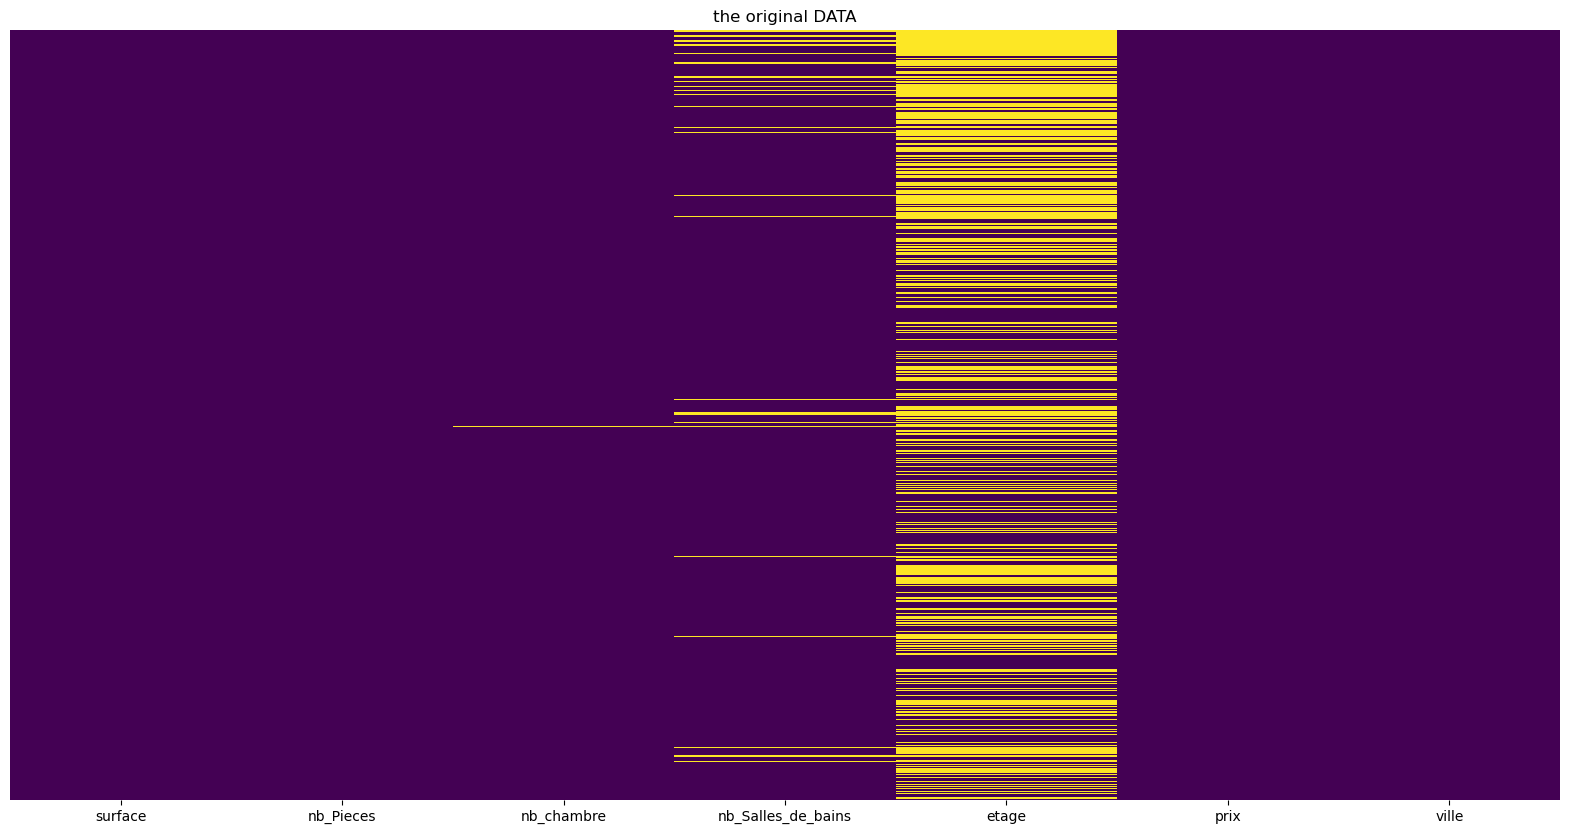

In [117]:

fig = plt.figure(figsize=(20,10))
plt.title("the original DATA")
sns.heatmap(df.isnull(),yticklabels = False, cbar=False,cmap='viridis')

In [118]:
#General function to hundle NAN values

def replace_Nan_values(df):
    
    #For 'nb_chambre' column
    Mean_0= math.ceil(df['nb_chambre'].median())
    df['nb_chambre'].fillna(Mean_0,inplace=True)


    #For 'nb_Salles_de_bains' column
    Mean_1= math.ceil(df['nb_Salles_de_bains'].median())
    df['nb_Salles_de_bains'].fillna(Mean_1,inplace=True)

    #For 'etage' column
    Mean_3= math.ceil(df['etage'].median())
    df['etage'].fillna(Mean_3,inplace=True)
    
    return df


>>Handeing NAN entries for Train

In [119]:
df_train=replace_Nan_values(df_train)

<AxesSubplot:title={'center':'TRAINING DATA'}>

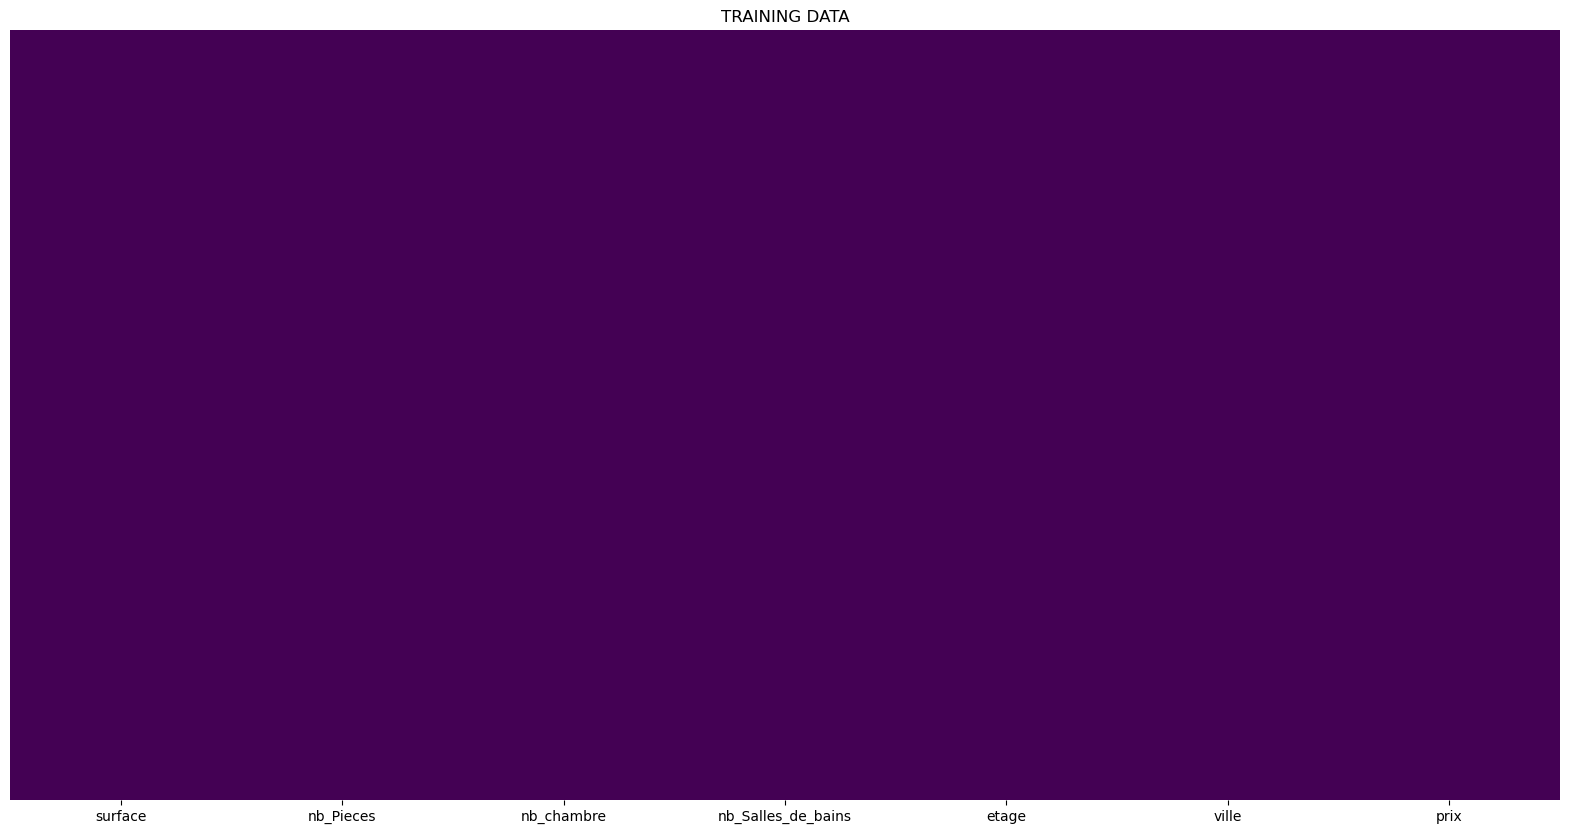

In [120]:
fig = plt.figure(figsize=(20,10))
plt.title("TRAINING DATA")
sns.heatmap(df_train.isnull(),yticklabels = False, cbar=False,cmap='viridis')

>>Handeing NAN entries for Test

In [121]:
df_test=replace_Nan_values(df_test)

<AxesSubplot:title={'center':'TEST DATA'}>

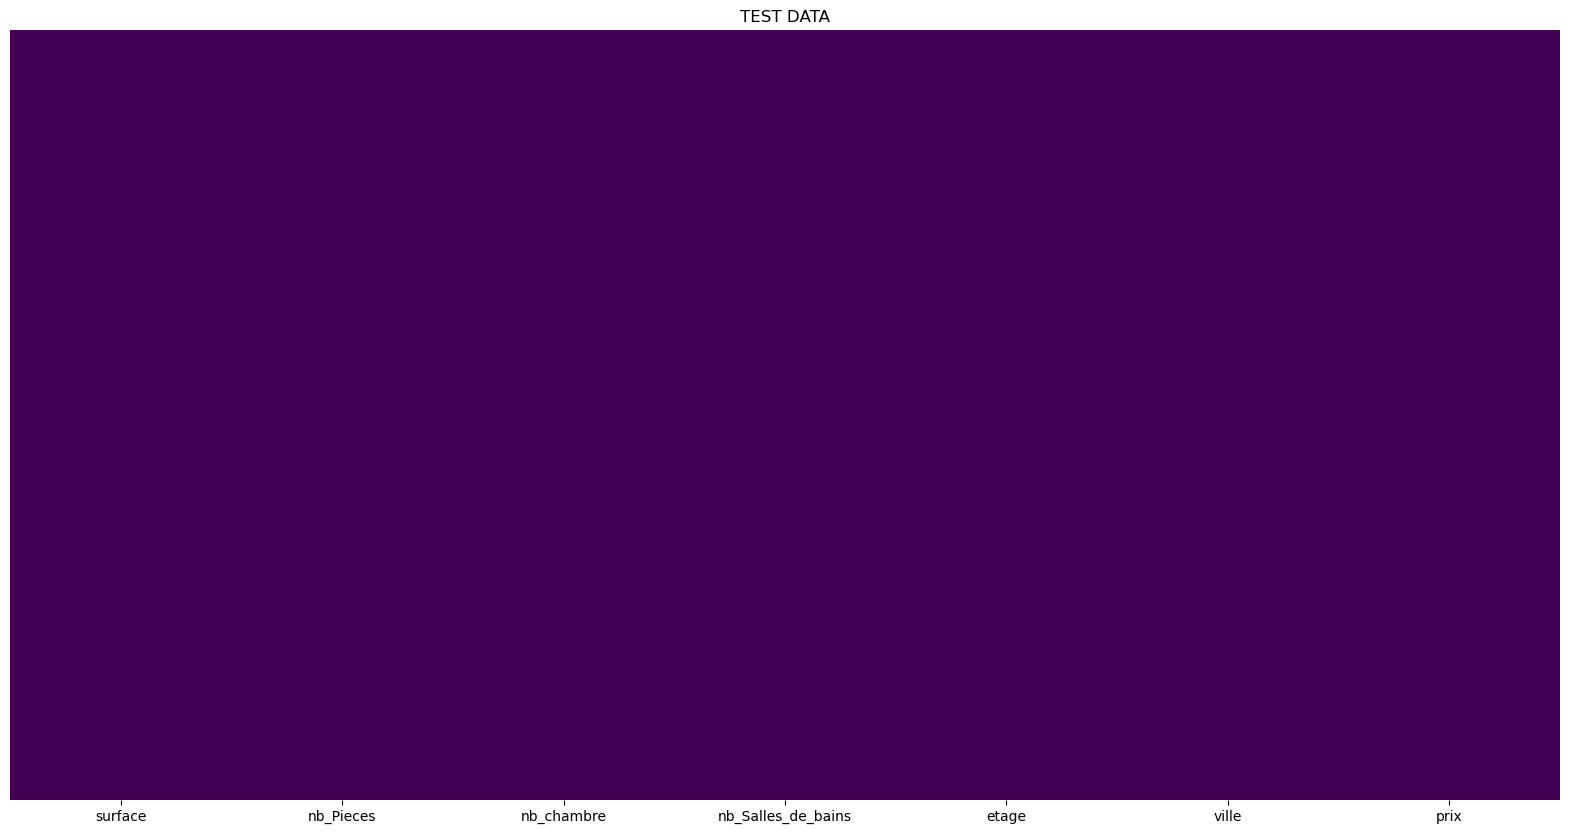

In [122]:
fig = plt.figure(figsize=(20,10))
plt.title("TEST DATA")
sns.heatmap(df_test.isnull(),yticklabels = False, cbar=False,cmap='viridis')

# >Feature Engineering : Only for Train

>>Handeling class embalance

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\

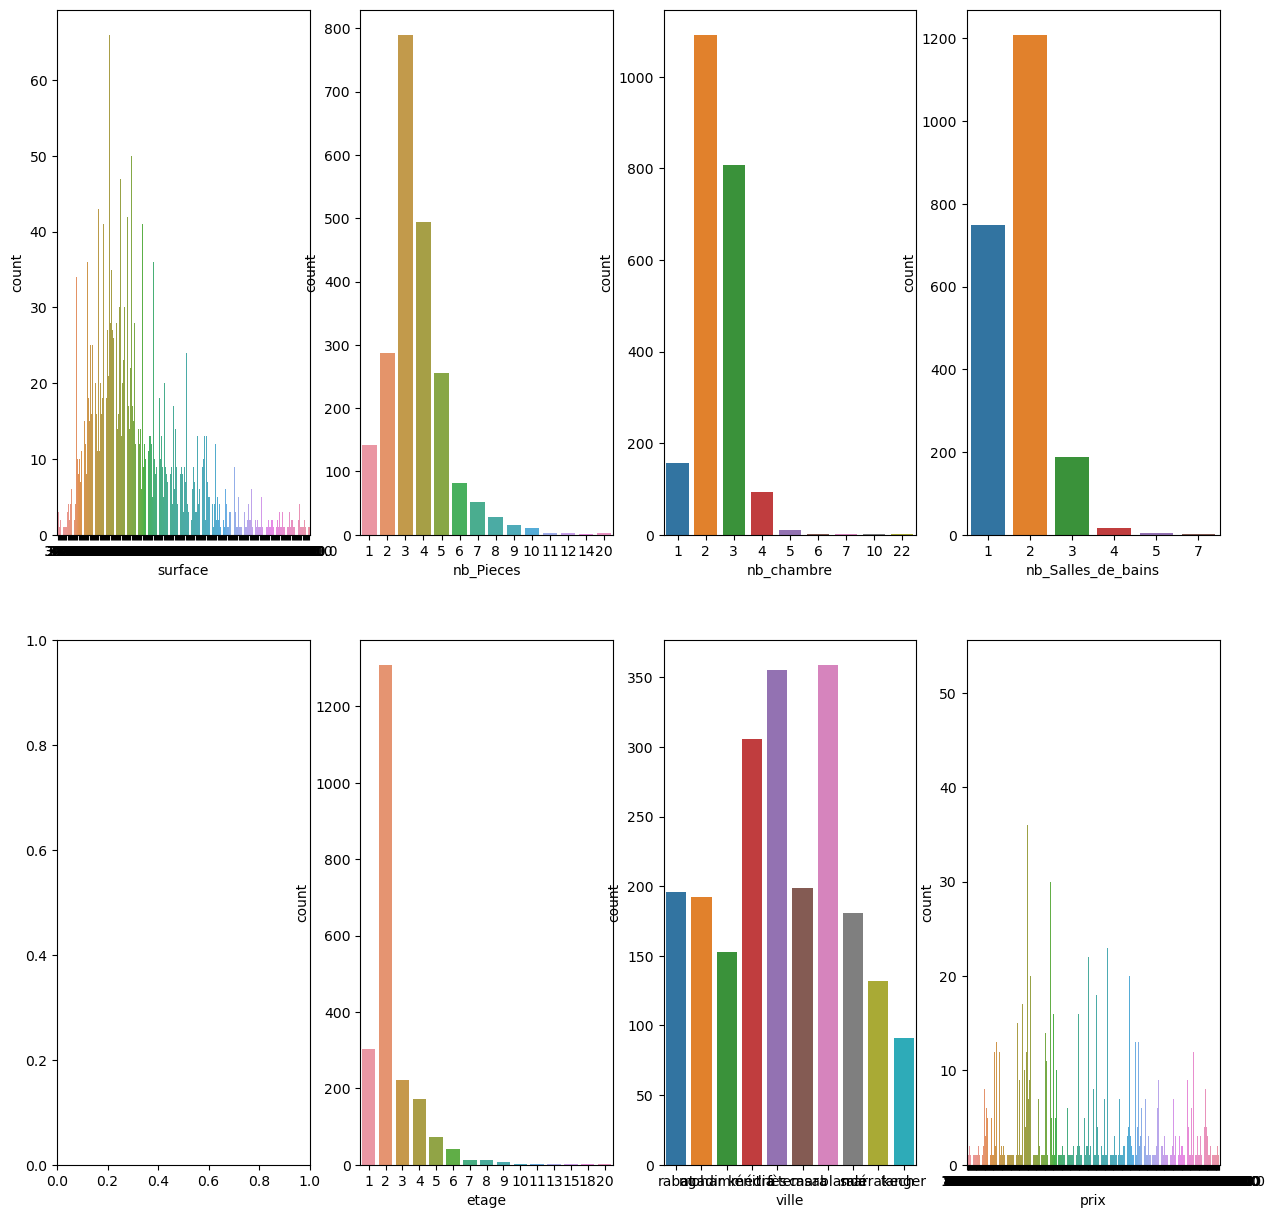

In [123]:
# Initialise the subplot function using number of rows and columns
fig, ax = plt.subplots(2,4,figsize=(15, 15)) 

# drawing the plot
sns.countplot(df_train["surface"],ax=ax[0,0])
sns.countplot(df_train["nb_Pieces"],ax=ax[0,1])
sns.countplot(df_train["nb_chambre"],ax=ax[0,2])
sns.countplot(df_train["nb_Salles_de_bains"],ax=ax[0,3])
sns.countplot(df_train["etage"],ax=ax[1,1])
sns.countplot(df_train["ville"],ax=ax[1,2])
sns.countplot(df_train["prix"],ax=ax[1,3])

plt.savefig("images.png",facecolor='w')
plt.show()

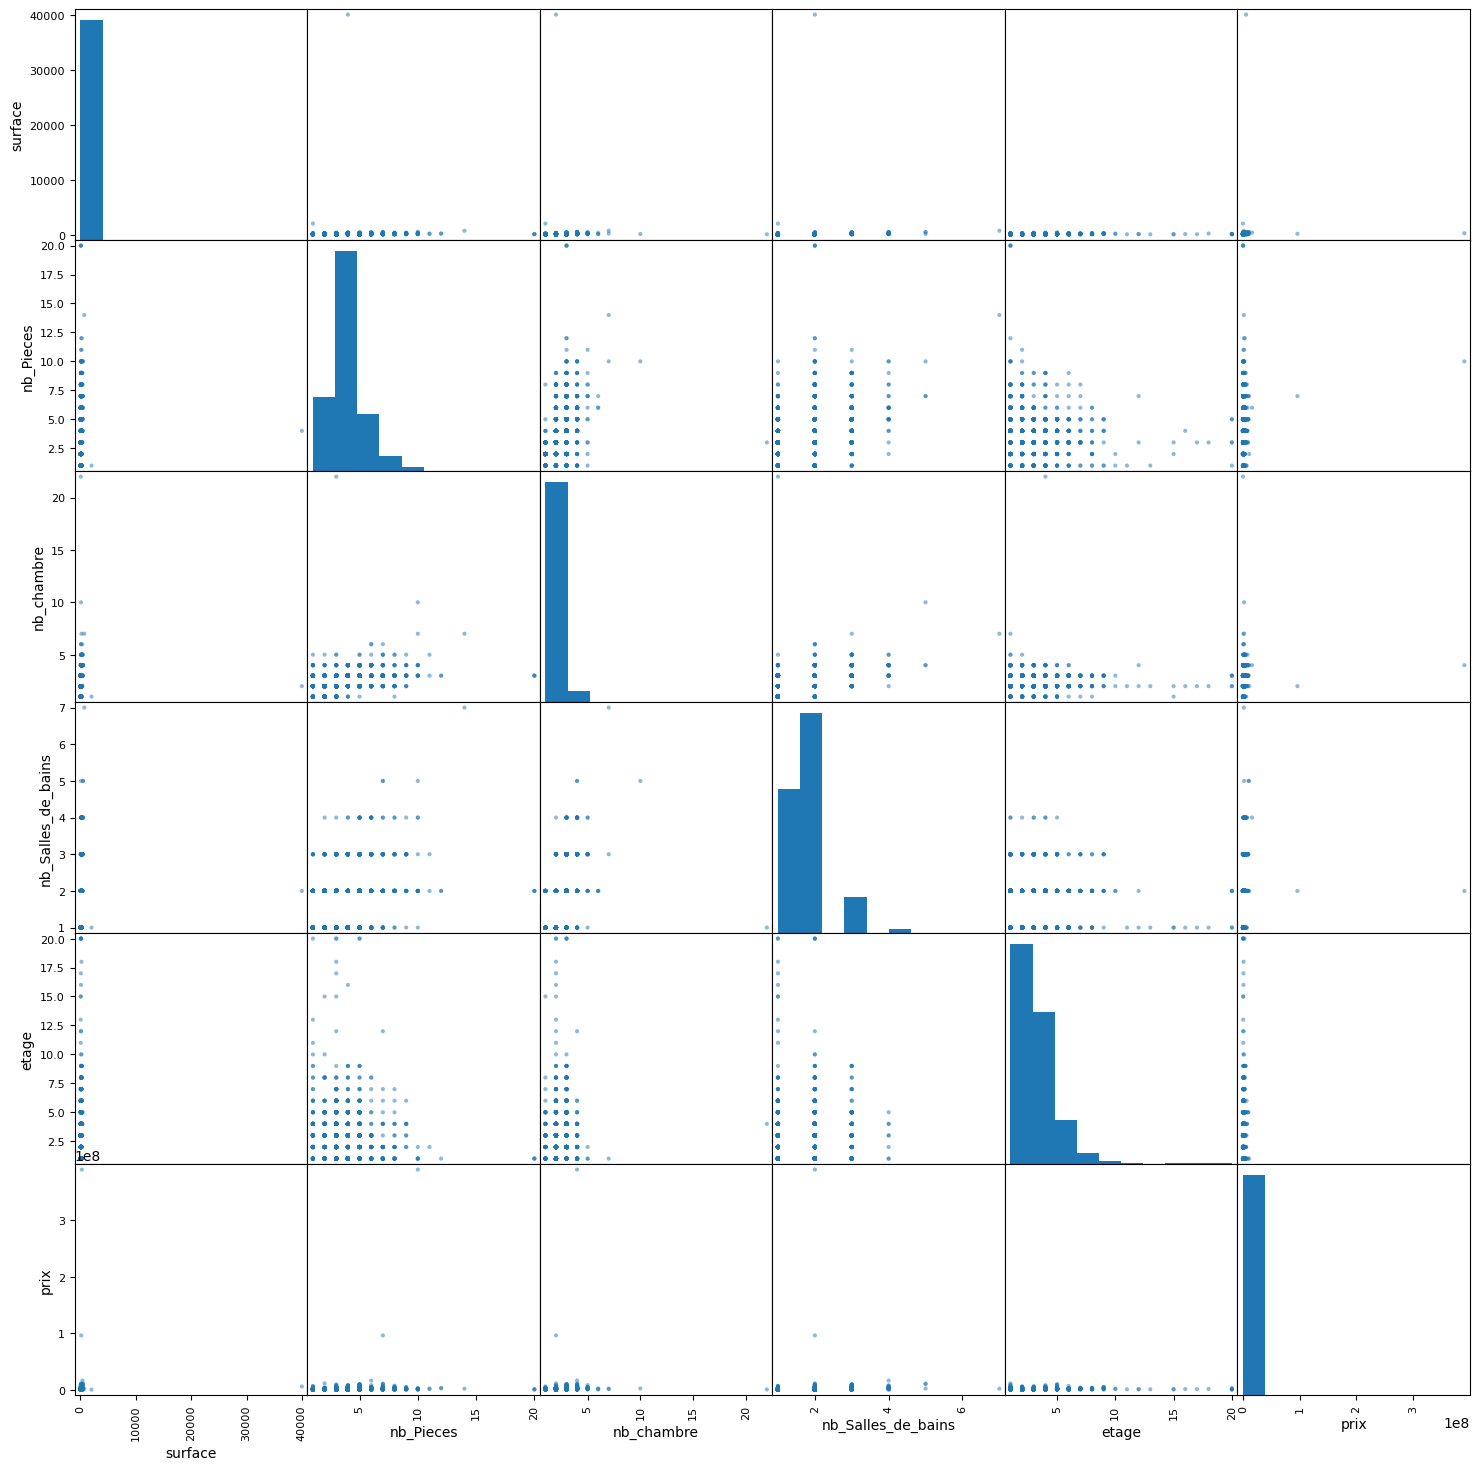

In [124]:

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

# Model Building

>>>Label Encoding for Train

In [125]:
# Import label encoder
from sklearn import preprocessing
def Label_encoding(df,col_name):  
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()

    # Encode labels in column 'BorrowerState'.
    df[col_name]= label_encoder.fit_transform( df[col_name] )
    

In [126]:
Label_encoding(df_train,'ville')

In [127]:
X_train = df_train.drop('prix',axis=1)
y_train = df_train['prix']

# Label Encoding for Test

In [128]:
Label_encoding(df_test,'ville')

In [129]:
X_test = df_test.drop('prix',axis=1)
y_test = df_test['prix']

In [130]:
X_train['ville']=X_train['ville'].astype('Int32')

# Model

RMSE = 1489548.86 
Le coefficient de détermination R2 = -0.41


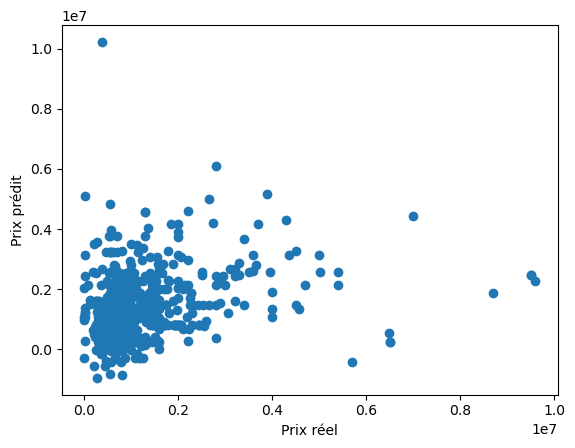

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

linreg=LinearRegression()

linreg.fit(X_train,y_train)

y_pred=linreg.predict(X_test)

print("RMSE = %.2f "
 % (metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("Le coefficient de détermination R2 = %.2f"
 % (metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.show()


In [132]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)
xgb=XGBRegressor()

xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)

test_MSE= mean_absolute_error(y_test,y_pred)
print('Test Accuracy-Score of XGBRegressor: {}'.format(test_MSE))
plt.scatter(y_test, y_pred)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.show()

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics

scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
# kfold = KFold(n_splits=5, random_state=25, shuffle=True)
# results = cross_val_score(model,
# X_train, y_train,
# cv=kfold,
# scoring='neg_root_mean_squared_error')
model.fit(X_train,y_train)
print("RMSE : %.3f (%.3f)"% (-results.mean(), results.std()))
plt.scatter(y_test, y_pred)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)

model1=LogisticRegression()

model1.fit(X_train,y_train)

y_pred=model1.predict(X_test)

print("Accuracy = %.2f%% des prédictions du modèle sur le jeu de test sont correctes."
 % (100*metrics.accuracy_score(y_test, y_pred)))

plt.show()

In [140]:
X_train

,surface,nb_Pieces,nb_chambre,nb_Salles_de_bains,etage,ville
761,155.0,8,3,3,2,6
1235,87.0,3,2,2,5,0
746,146.0,5,4,3,4,6
2656,75.0,4,2,2,3,5
2474,140.0,5,3,3,5,3
...,...,...,...,...,...,...
1639,75.0,7,2,2,2,2
1096,102.0,2,2,2,4,7
1131,63.0,1,2,2,2,7
1295,136.0,4,4,2,2,0


In [136]:
temp={}
temp['surface']=1
temp['nb_Pieces']=2
temp['nb_chambres']=3
temp['nb_Salles_de_bains']=4
temp['etage']=5
temp['ville']=1

In [138]:
df=pd.DataFrame({'x':temp}).transpose()

In [139]:
df

,etage,nb_Pieces,nb_Salles_de_bains,nb_chambres,surface,ville
x,5,2,4,3,1,1


In [ ]:
model.predict(df)[0]

In [ ]:
from pickle import dump

In [135]:
dump(model, 'C:/Users/PC /Desktop/Sefiani_hafsa El_Kaabi_Dounia/python_project/python_project/python_project/pageWebb/models/model.pkl)

SyntaxError: EOL while scanning string literal (3309515129.py, line 1)